In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

In [9]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [6]:
model = VGG16(weights='imagenet', include_top = True)
model.summary()

553467096/553467096 [==============================] - 108s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                          

In [10]:
img_path = './cc.png'
img = image.load_img(img_path, target_size = (224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
output = model.predict(x)

1/1 [==============================] - 0s 276ms/step


In [11]:
print('predicted: ', decode_predictions(output, top=5)[0])

35363/35363 [==============================] - 0s 0us/step
predicted:  [('n02124075', 'Egyptian_cat', 0.24437995), ('n02971356', 'carton', 0.13409089), ('n02104365', 'schipperke', 0.12704493), ('n02105412', 'kelpie', 0.049355492), ('n02948072', 'candle', 0.041444767)]


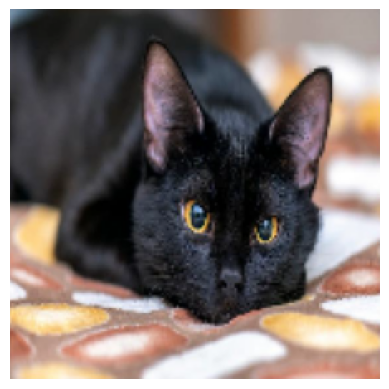

In [12]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [21]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications.vgg16 import preprocess_input, VGG16
import numpy as np
import matplotlib.pyplot as plt

In [22]:
gpus = tf.config.experimental.list_physical_devices("GPU")

In [23]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [24]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [25]:
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

In [26]:
model = VGG16(weights=None, include_top=True, classes=10, input_shape=(32,32,3))
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [27]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
ret = model.fit(x_train, y_train, epochs=100, batch_size=400, 
                validation_split=0.2, verbose=0)    

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (10,6))
ax[0].plot(ret.history['loss'], 'g-')
ax[0].set_titlte('train_loss')
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')

ax[1].plot(ret.history['accuracy'], 'b-', label = 'train accuracy')
ax[1].plot(ret.history['val_accuracy'], 'r-', label = 'val accuracy')
ax[1].set_title('accuracy')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')

plt.legend(loc='best')
fig.tight_layout()
plt.show()